#AML Detection Project

##Methodology used
The framework for the data project is using OSEMN Framework, which involves the following steps:

1. Obtain
2. Scrub
3. Explore
4. Model
5. Interpret



###Importing relevant libraries

In [ ]:
#Importing the relevant libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import drive
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, log_loss, cohen_kappa_score, matthews_corrcoef, roc_auc_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.layers import LSTM

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


#Obtain
For this section, the following steps are taken
1. Loading the dataset
2. Basic query on the dataset (No. of rows, datatypes, present of any null values, etc)

###Loading the Dataset

In [ ]:
#Importing the dataset (High Illicit Levels + Small Transaction Volume)
##Dataset from: https://www.kaggle.com/datasets/ealtman2019/ibm-transactions-for-anti-money-laundering-aml
##Dataset generated using AMLSim, details of research paper is available here: https://arxiv.org/abs/2306.16424

raw_df = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/HI-Medium_Trans.csv')

In [ ]:
print(raw_df.shape)

(31898238, 11)


In [ ]:
print(raw_df['Is Laundering'].value_counts())

Is Laundering
0    31863008
1       35230
Name: count, dtype: int64


##Sampling of the Dataset
As we can see, the dataset is rather large at 31,898,238 rows. In order to improve computational efficiency, the dataset will be reduced by a factor of 40, making it 796,575 rows.

However, in this scenario, we are using Downsampling methodology, to maintain the integridy of the interrelated connections between the generated Money Laundering patterns, whereas the ones that are not classified as Money Laundering, they are downsampled.

After downsampling, the absolute number of ML counts stands at 35,230, maintaining at a overall percentage of 4.4% of the dataset.

In [ ]:
# Separate majority and minority classes
df_majority = raw_df[raw_df['Is Laundering'] == 0]
df_minority = raw_df[raw_df['Is Laundering'] == 1]

# Downsample majority class
df_majority_downsampled = df_majority.sample(frac=0.02, random_state=42)

# Combine minority class with downsampled majority class
sampled_df = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
print(sampled_df['Is Laundering'].value_counts())

Is Laundering
0    637260
1     35230
Name: count, dtype: int64


### Basic Queries of the Dataset's Shape

In [ ]:
#Snippet
print("Snippet of the dataset: ", sampled_df.head())

Snippet of the dataset:                   Timestamp  From Bank    Account  To Bank  Account.1  \
17576161  2022/09/09 06:20      29574  8053A7450    20724  80C0323A0   
14742094  2022/09/07 21:14    2142469  8341DC7F0  2153437  838C71CB0   
17297887  2022/09/09 03:15    1145753  835CA35C0  1140210  83636F140   
5608738   2022/09/02 08:41     218456  8087AF690    42983  820DD8F60   
28765699  2022/09/15 22:44       9340  80F9C4840    34340  81FB792A0   

          Amount Received Receiving Currency  Amount Paid Payment Currency  \
17576161          7376.49          US Dollar      7376.49        US Dollar   
14742094          1462.51       Mexican Peso      1462.51     Mexican Peso   
17297887          1478.01       Mexican Peso      1478.01     Mexican Peso   
5608738           2573.59               Euro      2573.59             Euro   
28765699            50.16          US Dollar        50.16        US Dollar   

         Payment Format  Is Laundering  
17576161           Cash         

In [ ]:
#Info
print("Info regarding the dataset: ", sampled_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 672490 entries, 17576161 to 31896459
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Timestamp           672490 non-null  object 
 1   From Bank           672490 non-null  int64  
 2   Account             672490 non-null  object 
 3   To Bank             672490 non-null  int64  
 4   Account.1           672490 non-null  object 
 5   Amount Received     672490 non-null  float64
 6   Receiving Currency  672490 non-null  object 
 7   Amount Paid         672490 non-null  float64
 8   Payment Currency    672490 non-null  object 
 9   Payment Format      672490 non-null  object 
 10  Is Laundering       672490 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 61.6+ MB
Info regarding the dataset:  None


In [ ]:
#Description
print("Description of the dataset: ", sampled_df.describe())

Description of the dataset:            From Bank       To Bank  Amount Received   Amount Paid  \
count  6.724900e+05  6.724900e+05     6.724900e+05  6.724900e+05   
mean   2.875762e+05  3.988122e+05     8.139787e+06  6.818406e+06   
std    6.065648e+05  6.470307e+05     1.441645e+09  1.391870e+09   
min    0.000000e+00  0.000000e+00     1.000000e-06  1.000000e-06   
25%    2.776000e+03  2.593500e+04     2.262000e+02  2.276100e+02   
50%    3.722000e+04  1.433180e+05     1.674295e+03  1.675495e+03   
75%    2.149760e+05  2.536580e+05     1.270411e+04  1.264097e+04   
max    3.225433e+06  3.225305e+06     9.062701e+11  9.062701e+11   

       Is Laundering  
count  672490.000000  
mean        0.052387  
std         0.222807  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  


In [ ]:
#Null Values
print("Null values in the dataset: ", sampled_df.isnull().sum())

Null values in the dataset:  Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64


In [ ]:
#Shape of dataset
print("Shape of the dataset: ", sampled_df.shape)

Shape of the dataset:  (672490, 11)


In [ ]:
#Displaying the count of unique values in each column
def count_unique_values(df):
    unique_counts = {}

    for col in df.columns:
        unique_counts[col] = df[col].nunique()

    return pd.DataFrame.from_dict(unique_counts, orient='index', columns=['Unique Values'])

unique_counts_df = count_unique_values(sampled_df)
print("Count of unique values in the dataset", unique_counts_df)

Count of unique values in the dataset                     Unique Values
Timestamp                   26086
From Bank                   25616
Account                    354789
To Bank                     10412
Account.1                  455935
Amount Received            411310
Receiving Currency             15
Amount Paid                412459
Payment Currency               15
Payment Format                  7
Is Laundering                   2


In [ ]:
#Displaying the Count of Money Laundering for HI-Medium dataset
ML_counts = sampled_df['Is Laundering'].value_counts()
ML_count_table = pd.DataFrame({'Value': ML_counts.index, 'Count': ML_counts.values})
ML_count_table

,Value,Count
0,0,637260
1,1,35230


#Scrub
As part of the second step in the OSEMN Framework, this section is to perform cleaning towards the dataset, prior to exploring the dataset. However, as shown in the first section, there is no null-values and the data is consistent as this is a computer generated dataset, therefore no significant cleaning is needed.

However, some data transformation is required, to form better analyses for the dataset, which is breaking down of the timestamp column into individual columns for Year, Month, Day, Hour, Minute

###Breakdown of timestamp column

In [ ]:
sampled_df_chg = sampled_df.copy()

sampled_df_chg['Timestamp'] = pd.to_datetime(sampled_df_chg['Timestamp'])

sampled_df_chg['Year'] = sampled_df_chg['Timestamp'].dt.year.astype(int)
sampled_df_chg['Month'] = sampled_df_chg['Timestamp'].dt.month.astype(int)
sampled_df_chg['Day'] = sampled_df_chg['Timestamp'].dt.day.astype(int)
sampled_df_chg['Hour'] = sampled_df_chg['Timestamp'].dt.hour.astype(int)
sampled_df_chg['Second'] = sampled_df_chg['Timestamp'].dt.second.astype(int)

sampled_df_chg = sampled_df_chg.drop('Timestamp', axis=1)
sampled_df_chg = sampled_df_chg.drop('Second', axis=1)

In [ ]:
print(sampled_df_chg.head())

          From Bank    Account  To Bank  Account.1  Amount Received  \
17576161      29574  8053A7450    20724  80C0323A0          7376.49   
14742094    2142469  8341DC7F0  2153437  838C71CB0          1462.51   
17297887    1145753  835CA35C0  1140210  83636F140          1478.01   
5608738      218456  8087AF690    42983  820DD8F60          2573.59   
28765699       9340  80F9C4840    34340  81FB792A0            50.16   

         Receiving Currency  Amount Paid Payment Currency Payment Format  \
17576161          US Dollar      7376.49        US Dollar           Cash   
14742094       Mexican Peso      1462.51     Mexican Peso            ACH   
17297887       Mexican Peso      1478.01     Mexican Peso    Credit Card   
5608738                Euro      2573.59             Euro         Cheque   
28765699          US Dollar        50.16        US Dollar    Credit Card   

          Is Laundering  Year  Month  Day  Hour  
17576161              0  2022      9    9     6  
14742094        

#Explore
This section of the project details out the process of Exploratory Data Analysis, EDA, of which includes the following analysis for both the dataset as well as the filtered, only money laundering transactions.
1. Distribution of Money Laundering Data within the dataset
2. Types of payment instruments used and its distribution
3. Total count of unique accounts (Paying and Receiving)
4. Types of Payment currency used and its distribution
5. Types of Receiving currency used and its distribution
6. Total amount of Money Laundered as a proportion to Total transacted amount
7. Distribution of the Money Laundering by time (Year, Month, Day, Hour)

Creating a separate dataset that is purely ML transactions

In [ ]:
sampled_df_ML = sampled_df_chg[sampled_df_chg['Is Laundering'] == 1]

###Distribution of ML Transactions

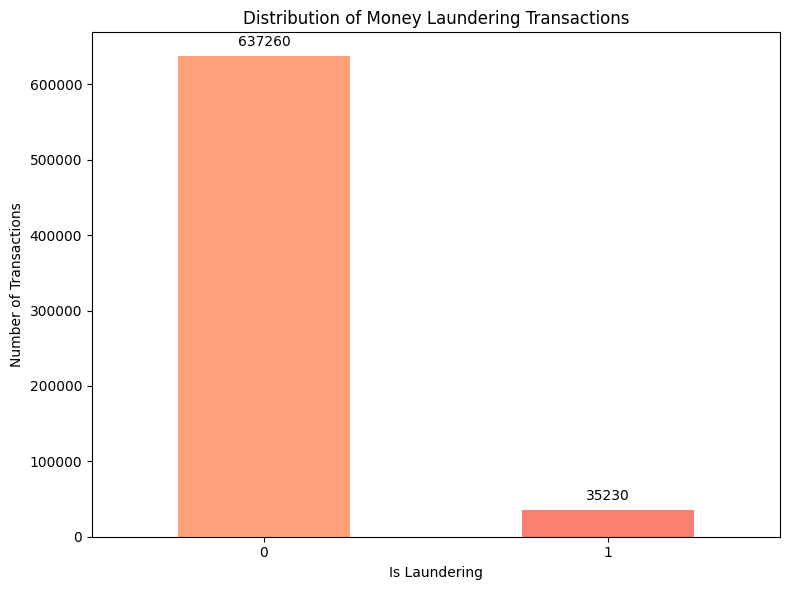

In [ ]:
plt.figure(figsize=(8, 6))
ax = sampled_df_chg['Is Laundering'].value_counts().plot(kind='bar', color=['#FFA07A', '#FA8072', '#E9967A'])

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Money Laundering Transactions')
plt.xlabel('Is Laundering')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

###Distribution of types of Payment Currency and Receiving Currencies used

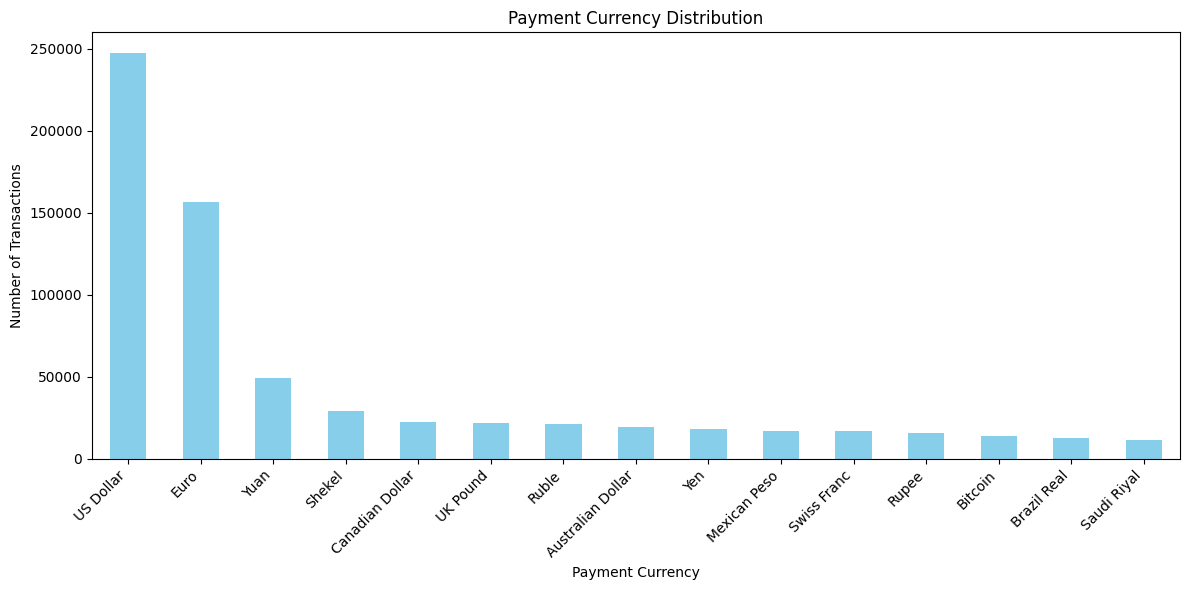

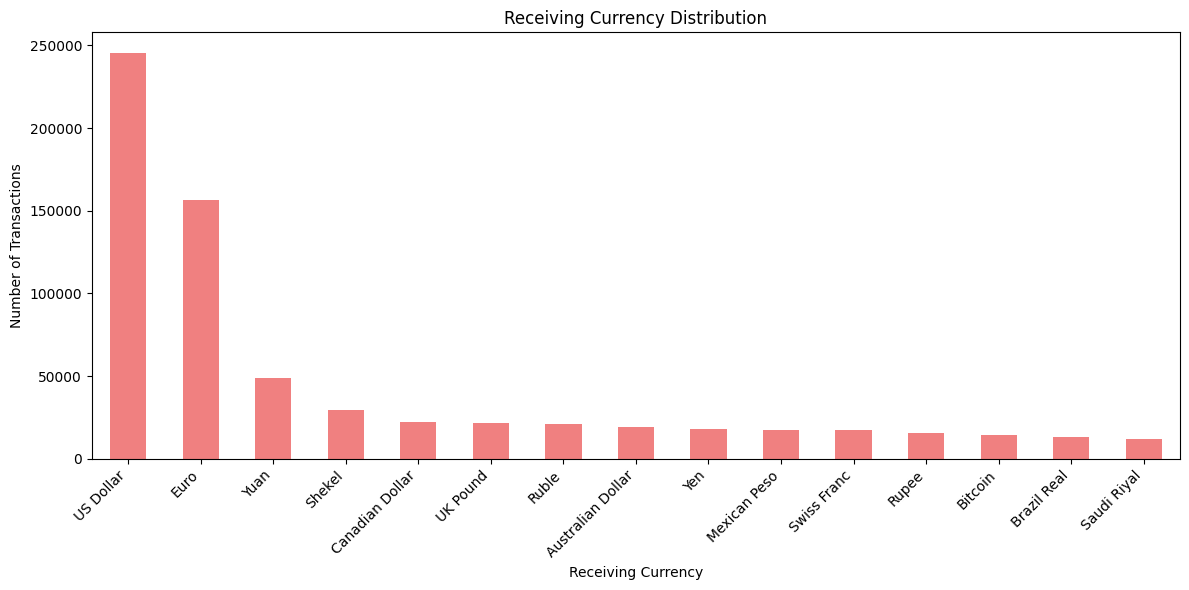

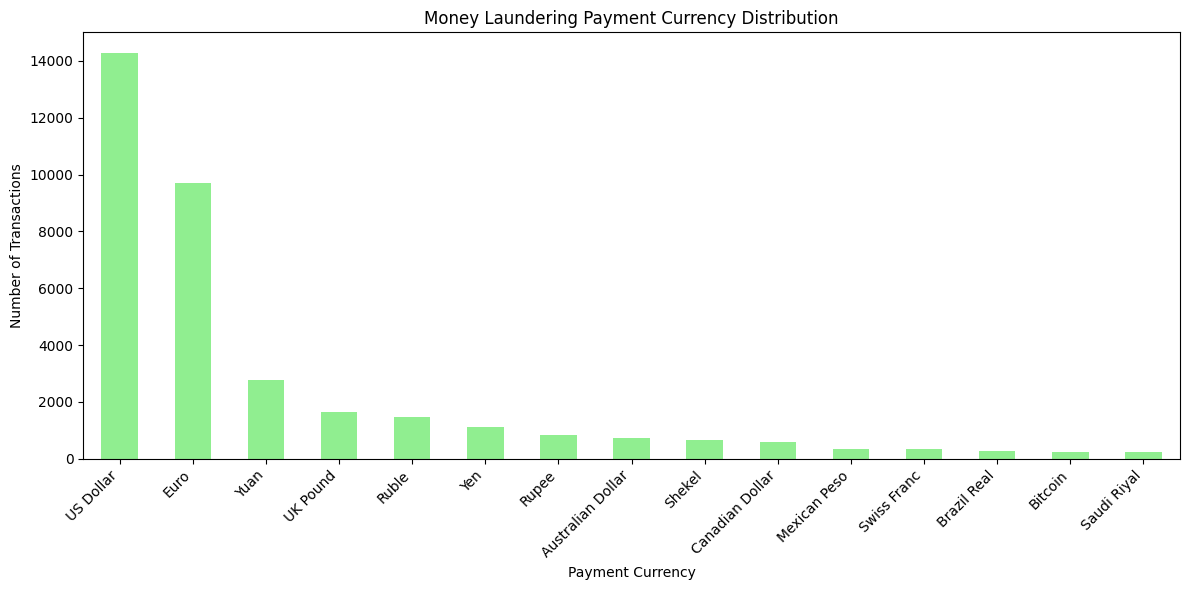

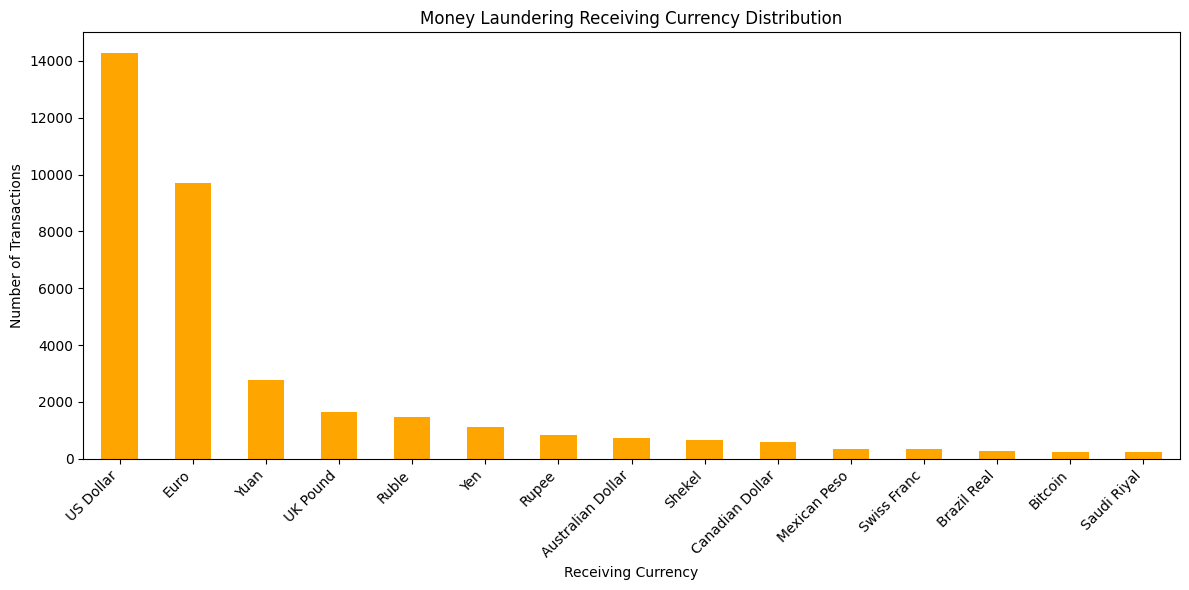

In [ ]:
plt.figure(figsize=(12, 6))
payment_currency_counts = sampled_df_chg['Payment Currency'].value_counts().sort_values(ascending=False)
payment_currency_counts.plot(kind='bar', color='skyblue')
plt.title('Payment Currency Distribution')
plt.xlabel('Payment Currency')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
receiving_currency_counts = sampled_df_chg['Receiving Currency'].value_counts().sort_values(ascending=False)
receiving_currency_counts.plot(kind='bar', color='lightcoral')
plt.title('Receiving Currency Distribution')
plt.xlabel('Receiving Currency')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sampled_df_ML_payment_currency_counts = sampled_df_ML['Payment Currency'].value_counts().sort_values(ascending=False)
sampled_df_ML_payment_currency_counts.plot(kind='bar', color='lightgreen')
plt.title('Money Laundering Payment Currency Distribution')
plt.xlabel('Payment Currency')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sampled_df_ML_receiving_currency_counts = sampled_df_ML['Receiving Currency'].value_counts().sort_values(ascending=False)
sampled_df_ML_receiving_currency_counts.plot(kind='bar', color='orange')
plt.title('Money Laundering Receiving Currency Distribution')
plt.xlabel('Receiving Currency')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###Histogram for Transactions (ML and Non-ML)

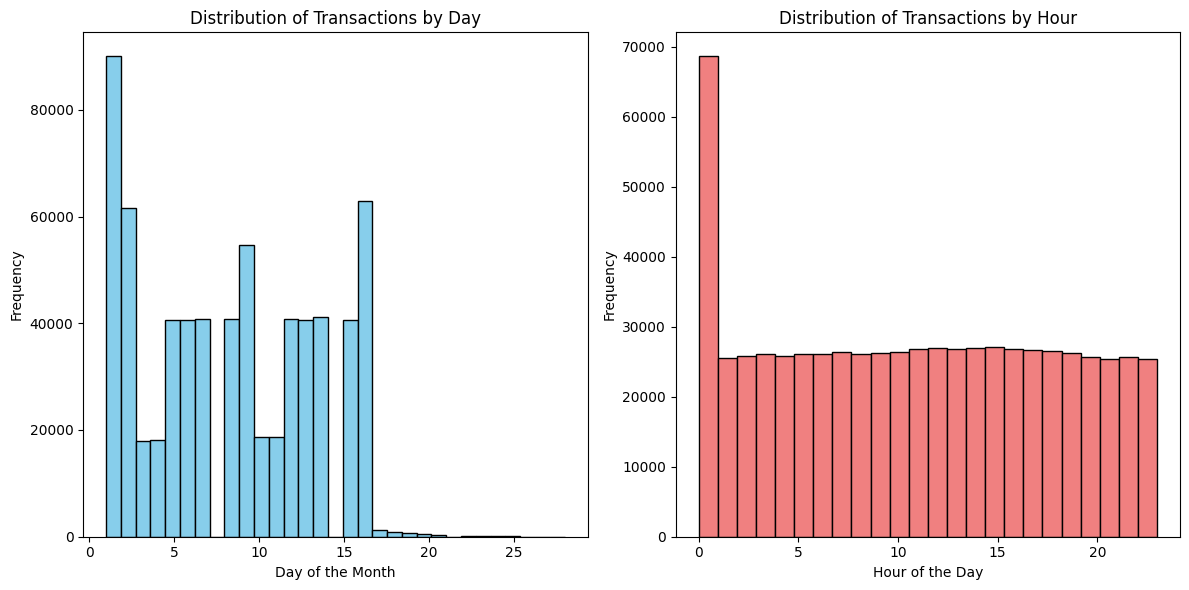

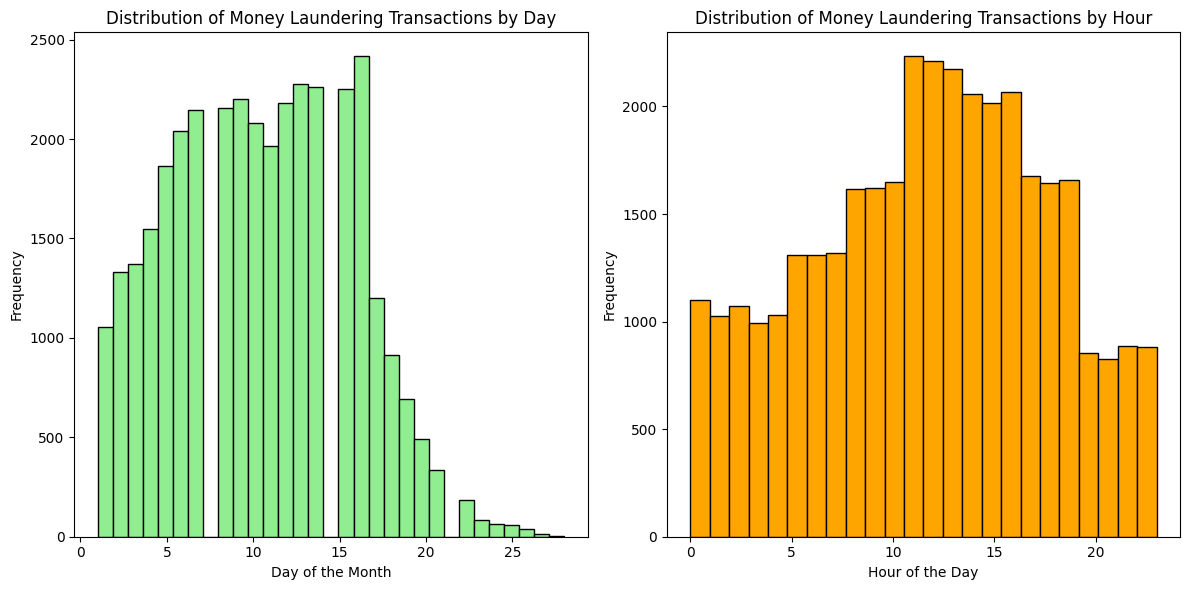

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(sampled_df_chg['Day'], bins=31, color='skyblue', edgecolor='black')
plt.title('Distribution of Transactions by Day')
plt.xlabel('Day of the Month')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(sampled_df_chg['Hour'], bins=24, color='lightcoral', edgecolor='black')
plt.title('Distribution of Transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(sampled_df_ML['Day'], bins=31, color='lightgreen', edgecolor='black')
plt.title('Distribution of Money Laundering Transactions by Day')
plt.xlabel('Day of the Month')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(sampled_df_ML['Hour'], bins=24, color='orange', edgecolor='black')
plt.title('Distribution of Money Laundering Transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

###Payment Format types distribution

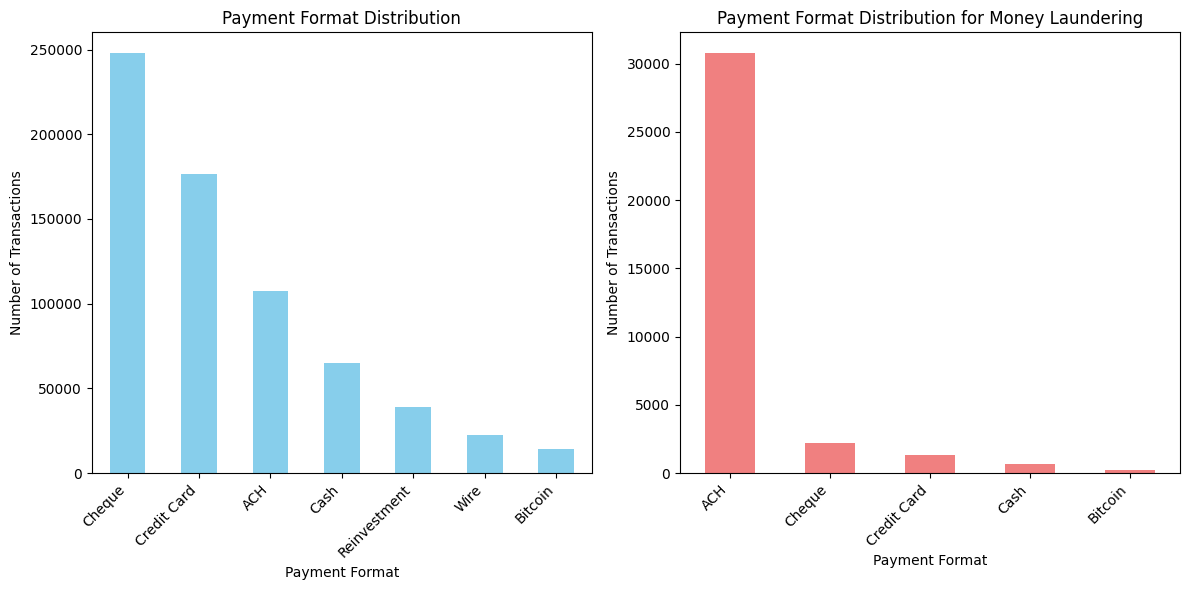

In [ ]:
plt.figure(figsize=(12, 6))

# Payment Format for all transactions
plt.subplot(1, 2, 1)
sampled_df_chg['Payment Format'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Payment Format Distribution')
plt.xlabel('Payment Format')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')

# Payment Format for ML transactions
plt.subplot(1, 2, 2)
sampled_df_ML['Payment Format'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Payment Format Distribution for Money Laundering')
plt.xlabel('Payment Format')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#Model
This section of the project performs dataset modification in order to prepare for machine learning modelling.

###Data Pre-Processing: Encoding
- Label Encoding - For Columns Account & Account.1
- One-Hot Encoding - Payment & Receiving Currency, Payment Format

###Data Pre-Processing: Over-Sampling
- SMOTE (Baseline) - To Address the minority class of Money Laundering = 1 (True)

###Hyperparameter Tuning
- GridSearchCV - To find the best parameters to be used for the Machine Learning and Deep Learning Models

###Machine Learning Models
- Random Forest
- Naive Bayes Classification
- Logistic Regression
- Decision Tree

###MDeep Learning Models
- Keras Deep Learning Model
- Convolutional Neural Networks (CNNs)
- Long Short-Term Memory (LSTM) Networks
- AutoEncoders
- Graph Convolutional Networks (GCNs)

##Pre-Modelling Steps

####Re-Import packages and Libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import drive
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, log_loss, cohen_kappa_score, matthews_corrcoef, roc_auc_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.layers import LSTM
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns

###Data Pre-Processing Step

In [ ]:
mldata = sampled_df_chg.copy()

###Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

mldata['Account'] = label_encoder.fit_transform(mldata['Account'])

mldata['Account.1'] = label_encoder.fit_transform(mldata['Account.1'])


###One-Hot Encoding

In [ ]:
mldata = pd.get_dummies(mldata, columns=['Payment Currency', 'Receiving Currency', 'Payment Format'], prefix=['Payment_Currency', 'Receiving_Currency', 'Payment_Format'])

###Outcome of the Encoding Methods


In [ ]:
print(mldata.head())
print(mldata.dtypes)

          From Bank  Account  To Bank  Account.1  Amount Received  \
17576161      29574    49261    20724      72187          7376.49   
14742094    2142469   270918  2153437     320426          1462.51   
17297887    1145753   277349  1140210     306767          1478.01   
5608738      218456    73278    42983     190848          2573.59   
28765699       9340   118372    34340     184526            50.16   

          Amount Paid  Is Laundering  Year  Month  Day  ...  \
17576161      7376.49              0  2022      9    9  ...   
14742094      1462.51              0  2022      9    7  ...   
17297887      1478.01              0  2022      9    9  ...   
5608738       2573.59              0  2022      9    2  ...   
28765699        50.16              0  2022      9   15  ...   

          Receiving_Currency_US Dollar  Receiving_Currency_Yen  \
17576161                          True                   False   
14742094                         False                   False   
17297887

###Train Test Split & SMOTE
This section will perform an experiment with the Train Test Split, using the train test ratio, with varying random state:
- Train: 80, Test: 20 (Random State: 42)
- Train: 90, Test: 10 (Random State: 84)

Furthermore, the two sets of train-test split will also experiment with the following oversampling methods:
- SMOTE

###SMOTE

In [ ]:
X = mldata.drop('Is Laundering', axis=1)
y = mldata['Is Laundering']
smote = SMOTE(random_state=99)

Set 1 smote1

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_smote1, y_train_smote1 = smote.fit_resample(X_train1, y_train1)


###Correlation Heatmap for the variables

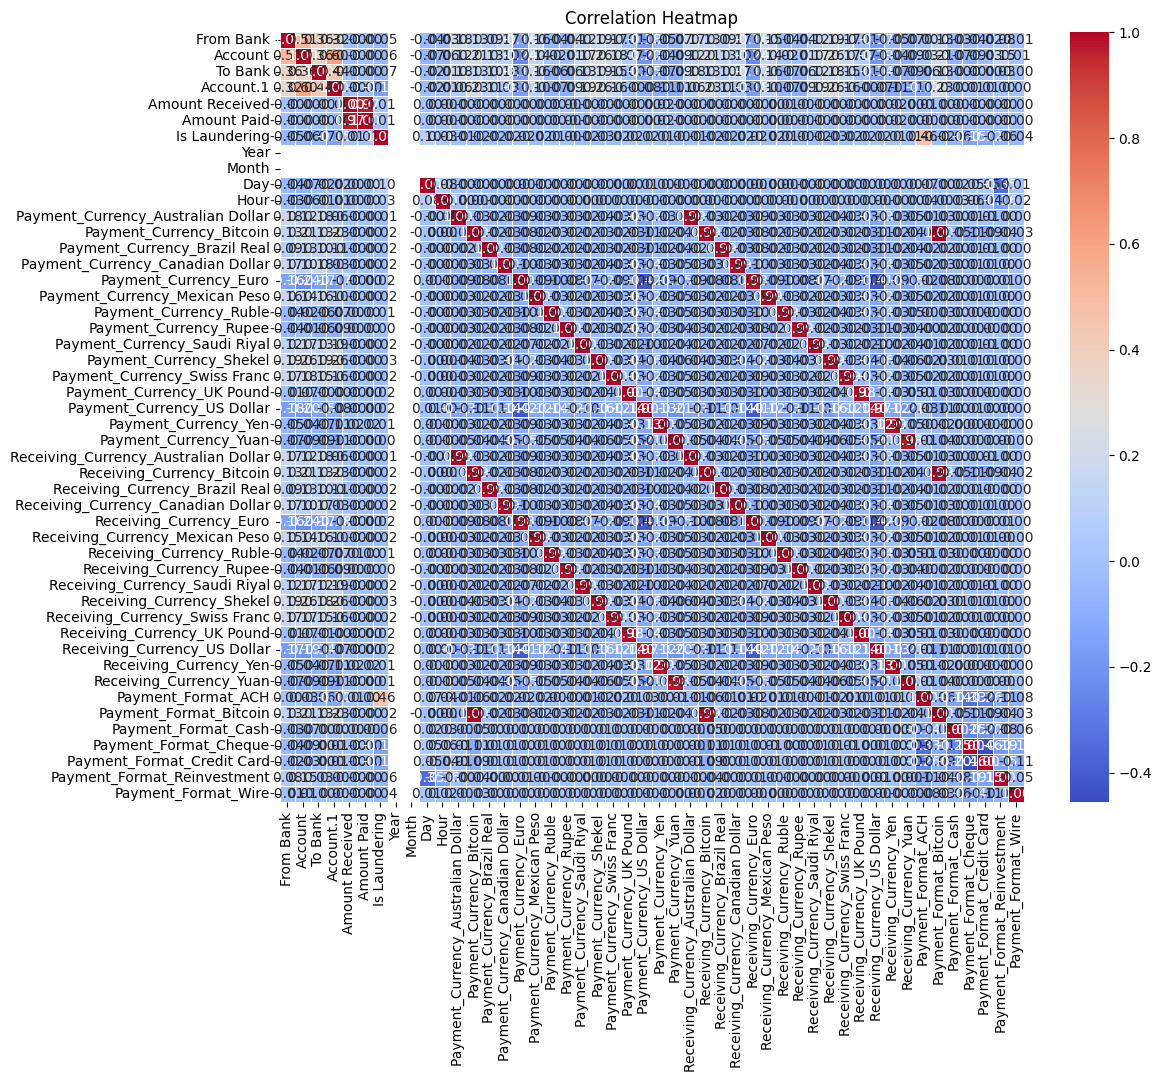

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = mldata.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

##Machine Learning Models

####Defining the models used

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=42)
naive_bayes = GaussianNB()
logistic_regression = LogisticRegression(n_jobs=-1, random_state=42)
random_forest = RandomForestClassifier(n_jobs=-1, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
svm_model = SVC(random_state=42)

###Baseline Machine Learning Models

In [ ]:
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_smote1, y_train_smote1)

y_pred1 = svm_model.predict(X_test1)
y_prob1 = svm_model.predict_proba(X_test1)[:, 1]


cm = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - SVM')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test1, y_prob1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc="lower right")
plt.show()

accuracy = accuracy_score(y_test1, y_pred1)
precision = precision_score(y_test1, y_pred1)
recall = recall_score(y_test1, y_pred1)
f1 = f1_score(y_test1, y_pred1)

tn, fp, fn, tp = confusion_matrix(y_test1, y_pred1).ravel()
TPR = tp / (tp + fn)
FPR = fp / (fp + tn)
TNR = tn / (tn + fp)
FNR = fn / (tp + fn)
youden_j = TPR - FPR

data = {'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
        'Value': [accuracy, precision, recall, f1, TPR, FPR, TNR, FNR, youden_j]}
metrics_df = pd.DataFrame(data)
metrics_df

In [ ]:
importances = svm_model.coef_

feature_importances = pd.DataFrame({'Feature': X_train1.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances

####Baseline Naive Bayes Model

Naive Bayes - Accuracy: 0.9472928965486476
Naive Bayes - Precision: 0.23728813559322035
Naive Bayes - Recall: 0.0019835647492207425
Naive Bayes - F1 Score: 0.003934241955880287
Naive Bayes - False Positive Rate: 0.00035310734463276836


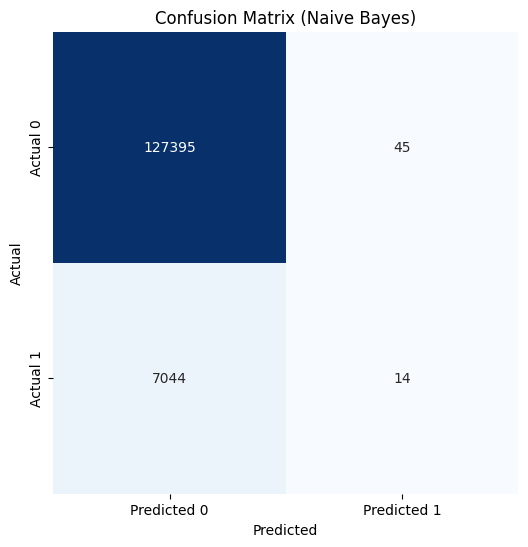

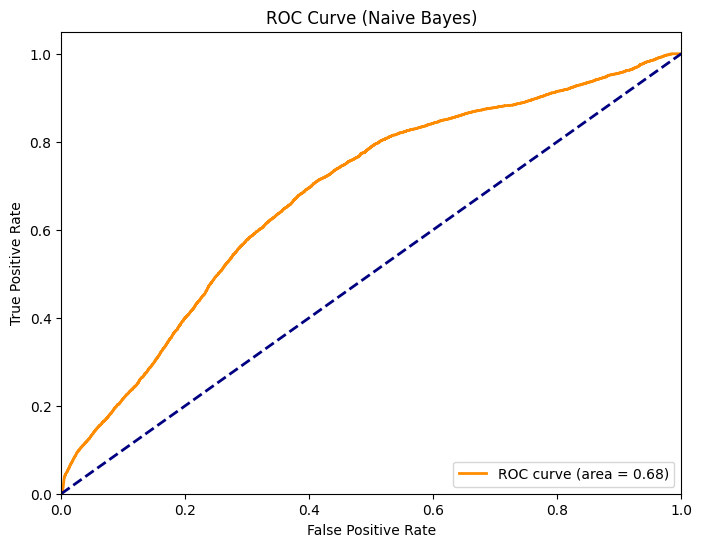

In [ ]:
naive_bayes.fit(X_train_smote1, y_train_smote1)
y_pred_nb = naive_bayes.predict(X_test1)
y_prob_nb = naive_bayes.predict_proba(X_test1)[:, 1]

accuracy_nb = accuracy_score(y_test1, y_pred_nb)
precision_nb = precision_score(y_test1, y_pred_nb)
recall_nb = recall_score(y_test1, y_pred_nb)
f1_nb = f1_score(y_test1, y_pred_nb)

conf_matrix_nb = confusion_matrix(y_test1, y_pred_nb)

TN = conf_matrix_nb[0, 0]
FP = conf_matrix_nb[0, 1]
FN = conf_matrix_nb[1, 0]
TP = conf_matrix_nb[1, 1]

FPR_nb = FP / (FP+TN)

fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test1, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

print(f"Naive Bayes - Accuracy: {accuracy_nb}")
print(f"Naive Bayes - Precision: {precision_nb}")
print(f"Naive Bayes - Recall: {recall_nb}")
print(f"Naive Bayes - F1 Score: {f1_nb}")
print(f"Naive Bayes - False Positive Rate: {FPR_nb}")

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Naive Bayes)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Naive Bayes)')
plt.legend(loc="lower right")
plt.show()

####Baseline Random Forest Model

Random Forest - Accuracy: 0.9645050484022067
Random Forest - Precision: 0.6322371468272349
Random Forest - Recall: 0.7735902521960896
Random Forest - F1 Score: 0.695807314897413
Random Forest - False Positive Rate: 0.02492153170119272


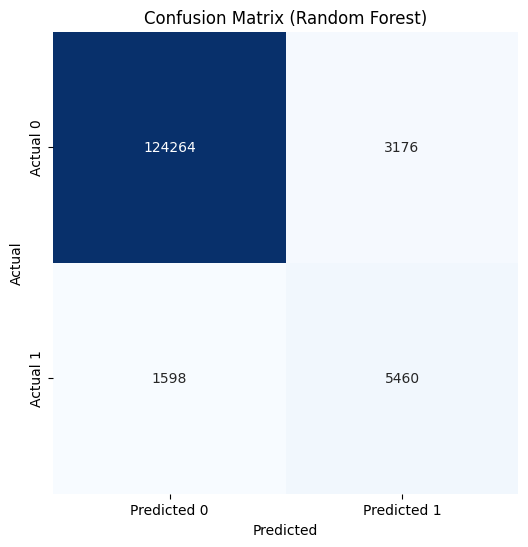

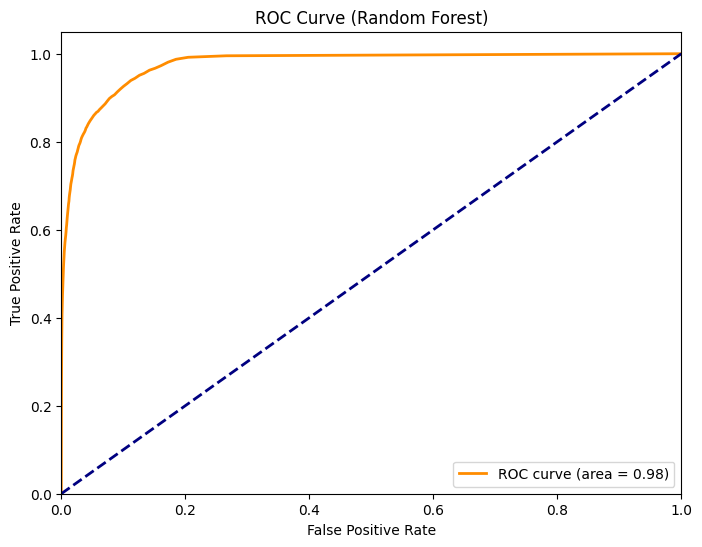

In [ ]:
random_forest.fit(X_train_smote1, y_train_smote1)
y_pred_rf = random_forest.predict(X_test1)
y_prob_rf = random_forest.predict_proba(X_test1)[:, 1]

accuracy_rf = accuracy_score(y_test1, y_pred_rf)
precision_rf = precision_score(y_test1, y_pred_rf)
recall_rf = recall_score(y_test1, y_pred_rf)
f1_rf = f1_score(y_test1, y_pred_rf)

conf_matrix_rf = confusion_matrix(y_test1, y_pred_rf)

TN = conf_matrix_rf[0, 0]
FP = conf_matrix_rf[0, 1]
FN = conf_matrix_rf[1, 0]
TP = conf_matrix_rf[1, 1]

FPR_rf = FP / (FP + TN)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test1, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

print(f"Random Forest - Accuracy: {accuracy_rf}")
print(f"Random Forest - Precision: {precision_rf}")
print(f"Random Forest - Recall: {recall_rf}")
print(f"Random Forest - F1 Score: {f1_rf}")
print(f"Random Forest - False Positive Rate: {FPR_rf}")

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend(loc="lower right")
plt.show()

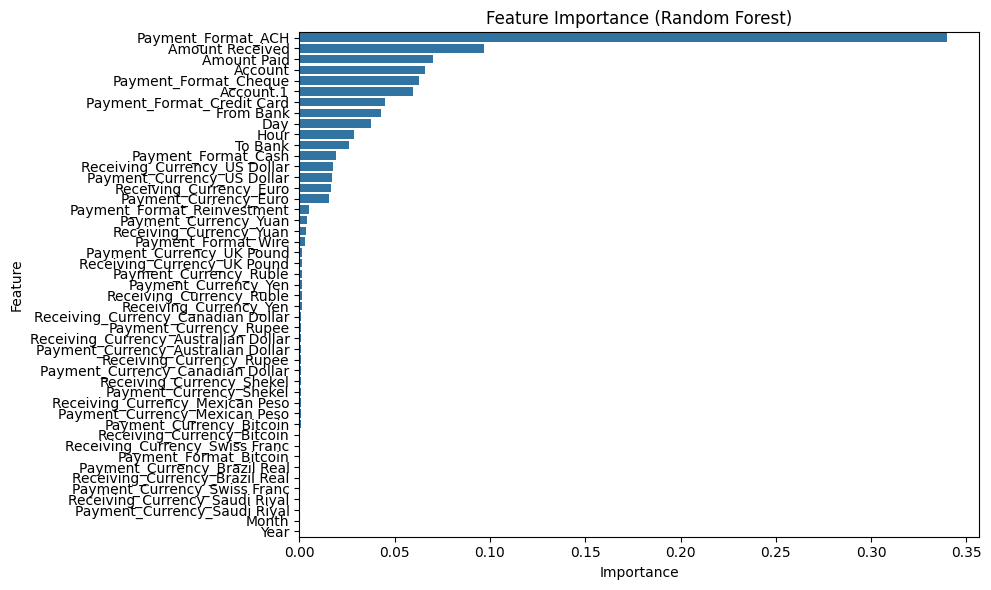

In [ ]:
feature_importances = random_forest.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

####Baseline Logistic Regression Model

Logistic Regression - Accuracy: 0.7685616142990974
Logistic Regression - Precision: 0.1193864642631246
Logistic Regression - Recall: 0.5348540663077359
Logistic Regression - F1 Score: 0.1952014064843063
Logistic Regression - False Positive Rate: 0.21849497802887632


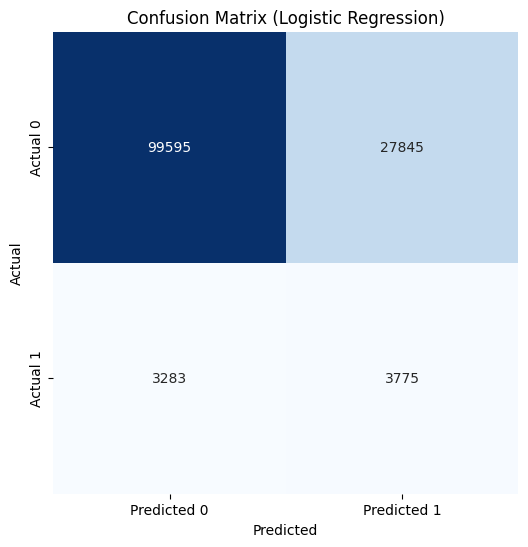

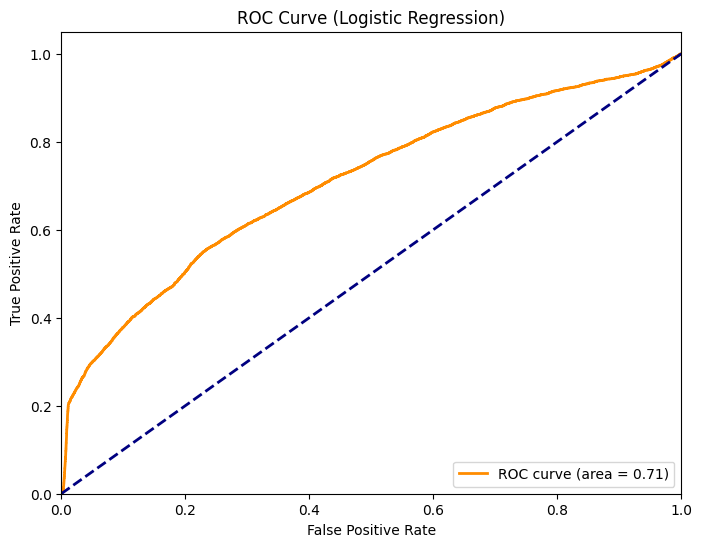

In [ ]:
logistic_regression.fit(X_train_smote1, y_train_smote1)
y_pred_lr = logistic_regression.predict(X_test1)
y_prob_lr = logistic_regression.predict_proba(X_test1)[:, 1]

accuracy_lr = accuracy_score(y_test1, y_pred_lr)
precision_lr = precision_score(y_test1, y_pred_lr)
recall_lr = recall_score(y_test1, y_pred_lr)
f1_lr = f1_score(y_test1, y_pred_lr)

conf_matrix_lr = confusion_matrix(y_test1, y_pred_lr)

TN = conf_matrix_lr[0, 0]
FP = conf_matrix_lr[0, 1]
FN = conf_matrix_lr[1, 0]
TP = conf_matrix_lr[1, 1]

FPR_lr = FP / (FP + TN)

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test1, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

print(f"Logistic Regression - Accuracy: {accuracy_lr}")
print(f"Logistic Regression - Precision: {precision_lr}")
print(f"Logistic Regression - Recall: {recall_lr}")
print(f"Logistic Regression - F1 Score: {f1_lr}")
print(f"Logistic Regression - False Positive Rate: {FPR_lr}")

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

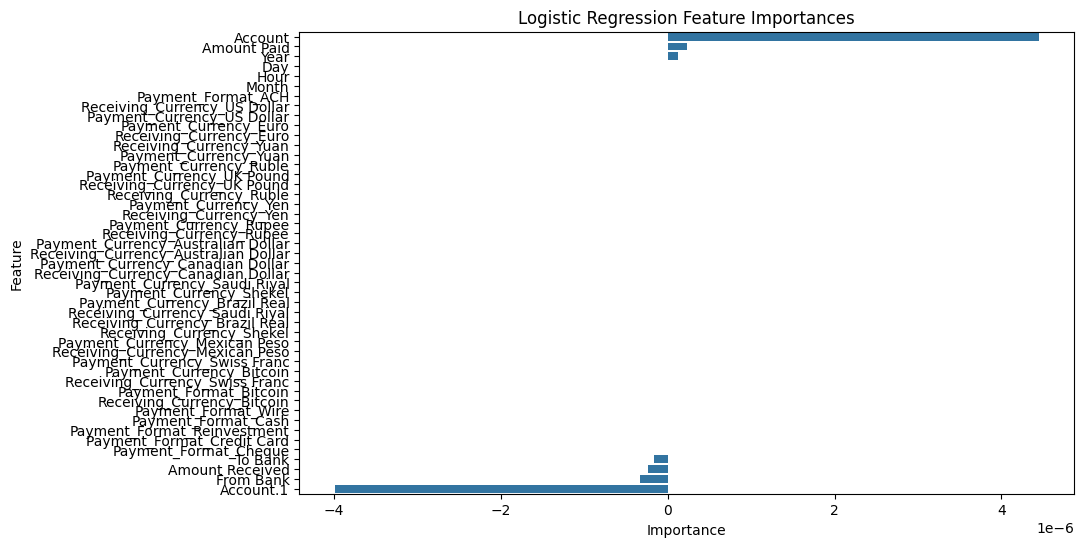

In [ ]:
feature_importances = logistic_regression.coef_[0]

feature_importance_df = pd.DataFrame({'Feature': X_train_smote1.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Logistic Regression Feature Importances')
plt.show()

####Baseline Decision Tree Model

Decision Tree - Accuracy: 0.9528022721527457
Decision Tree - Precision: 0.5375105663567202
Decision Tree - Recall: 0.720742419948994
Decision Tree - F1 Score: 0.6157850139208328
Decision Tree - False Positive Rate: 0.03434557438794727


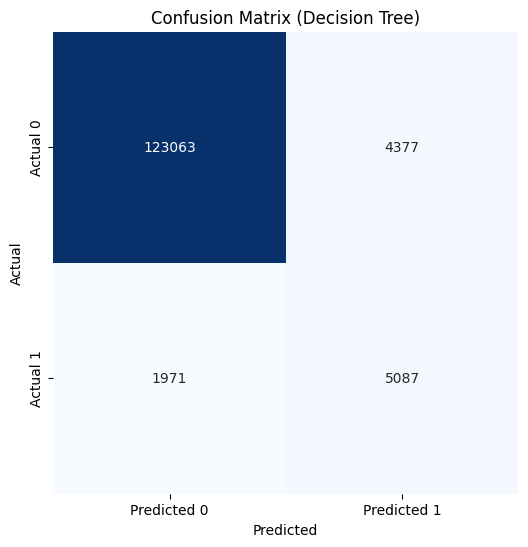

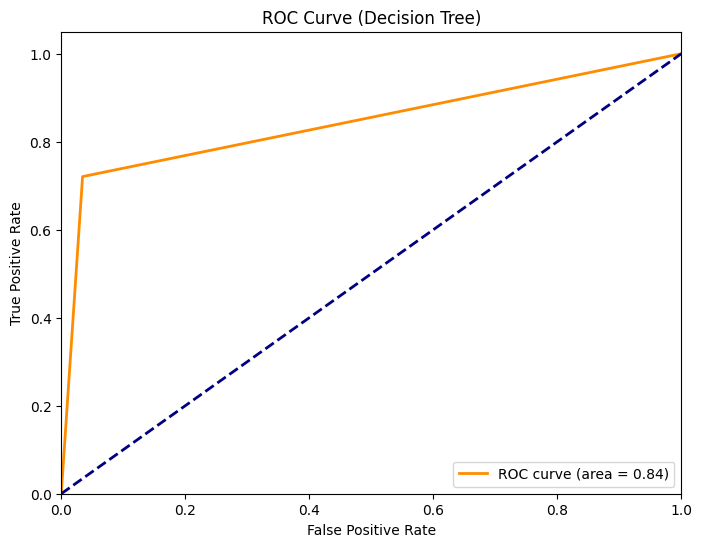

In [ ]:
decision_tree.fit(X_train_smote1, y_train_smote1)
y_pred_dt = decision_tree.predict(X_test1)
y_prob_dt = decision_tree.predict_proba(X_test1)[:, 1]

accuracy_dt = accuracy_score(y_test1, y_pred_dt)
precision_dt = precision_score(y_test1, y_pred_dt)
recall_dt = recall_score(y_test1, y_pred_dt)
f1_dt = f1_score(y_test1, y_pred_dt)

conf_matrix_dt = confusion_matrix(y_test1, y_pred_dt)

TN = conf_matrix_dt[0, 0]
FP = conf_matrix_dt[0, 1]
FN = conf_matrix_dt[1, 0]
TP = conf_matrix_dt[1, 1]

FPR_dt = FP / (FP + TN)

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test1, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

print(f"Decision Tree - Accuracy: {accuracy_dt}")
print(f"Decision Tree - Precision: {precision_dt}")
print(f"Decision Tree - Recall: {recall_dt}")
print(f"Decision Tree - F1 Score: {f1_dt}")
print(f"Decision Tree - False Positive Rate: {FPR_dt}")

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Decision Tree)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Decision Tree)')
plt.legend(loc="lower right")
plt.show()

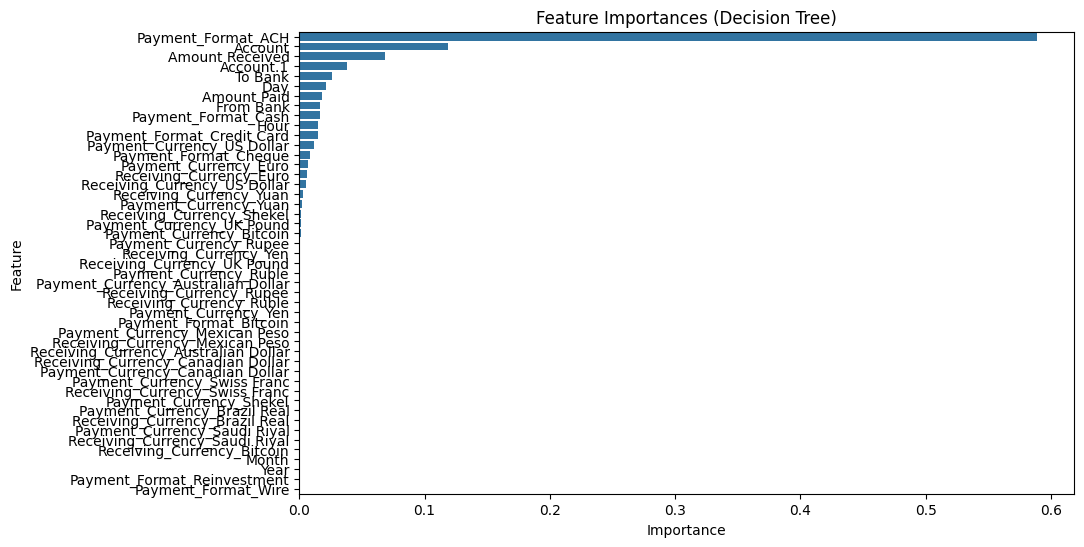

In [ ]:
feature_importances = decision_tree.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train_smote1.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (Decision Tree)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

####Baseline Gradient Boost Model

Gradient Boosting - Accuracy: 0.9333596038602805
Gradient Boosting - Precision: 0.43132165260653255
Gradient Boosting - Recall: 0.8475488807027487
Gradient Boosting - F1 Score: 0.5717016294738854
Gradient Boosting - False Positive Rate: 0.0618879472693032


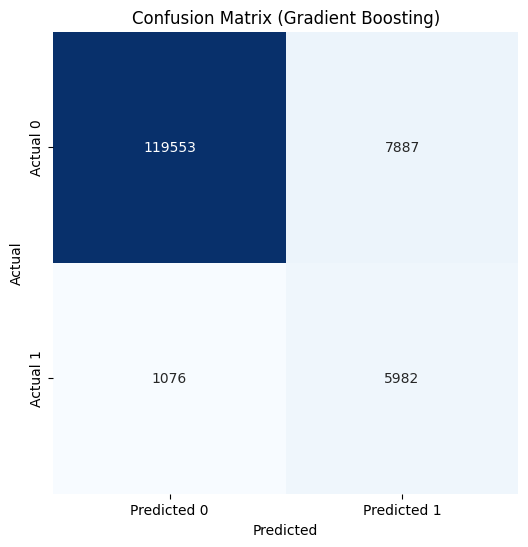

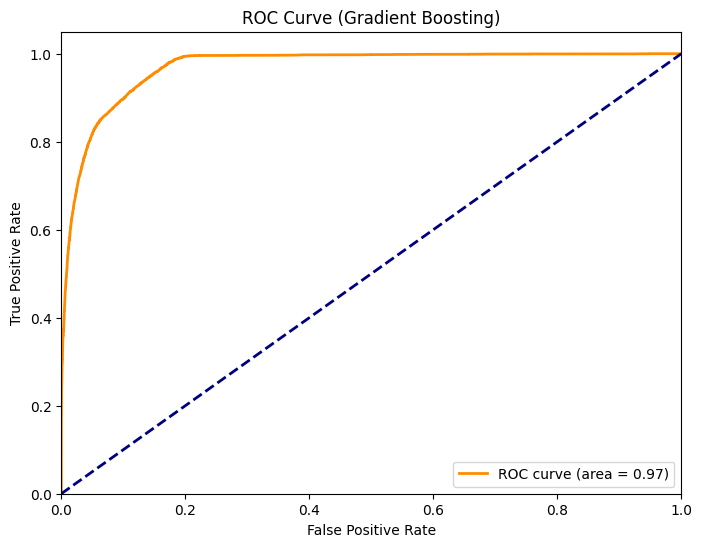

In [ ]:
gb_model.fit(X_train_smote1, y_train_smote1)
y_pred_gb = gb_model.predict(X_test1)
y_prob_gb = gb_model.predict_proba(X_test1)[:, 1]

accuracy_gb = accuracy_score(y_test1, y_pred_gb)
precision_gb = precision_score(y_test1, y_pred_gb)
recall_gb = recall_score(y_test1, y_pred_gb)
f1_gb = f1_score(y_test1, y_pred_gb)

conf_matrix_gb = confusion_matrix(y_test1, y_pred_gb)

TN = conf_matrix_gb[0, 0]
FP = conf_matrix_gb[0, 1]
FN = conf_matrix_gb[1, 0]
TP = conf_matrix_gb[1, 1]

FPR_gb = FP / (FP + TN)

fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test1, y_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print(f"Gradient Boosting - Accuracy: {accuracy_gb}")
print(f"Gradient Boosting - Precision: {precision_gb}")
print(f"Gradient Boosting - Recall: {recall_gb}")
print(f"Gradient Boosting - F1 Score: {f1_gb}")
print(f"Gradient Boosting - False Positive Rate: {FPR_gb}")

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Gradient Boosting)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Gradient Boosting)')
plt.legend(loc="lower right")
plt.show()

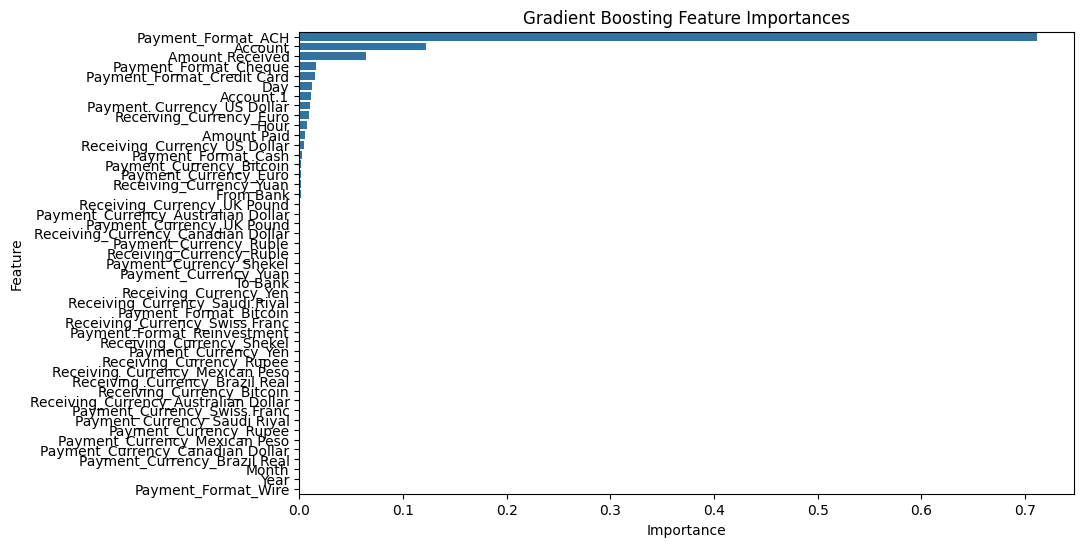

In [ ]:
feature_importances = gb_model.feature_importances_
feature_names = X_train_smote1.columns

importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Gradient Boosting Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

####Baseline XGBoost Model

XGBoost - Accuracy: 0.9558580796740472
XGBoost - Precision: 0.5533453887884268
XGBoost - Recall: 0.8237461037120998
XGBoost - F1 Score: 0.66199829205807
XGBoost - False Positive Rate: 0.03682517263025738


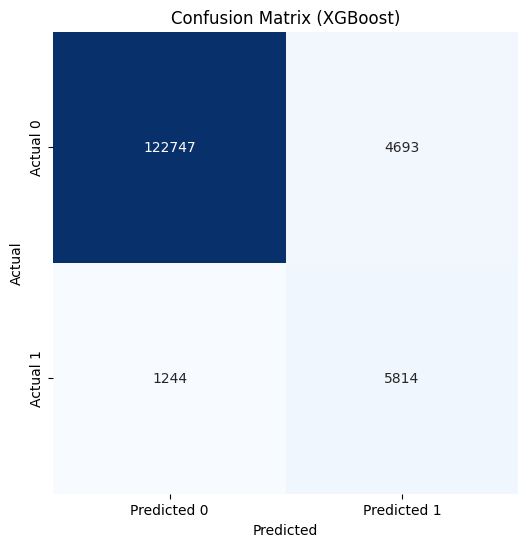

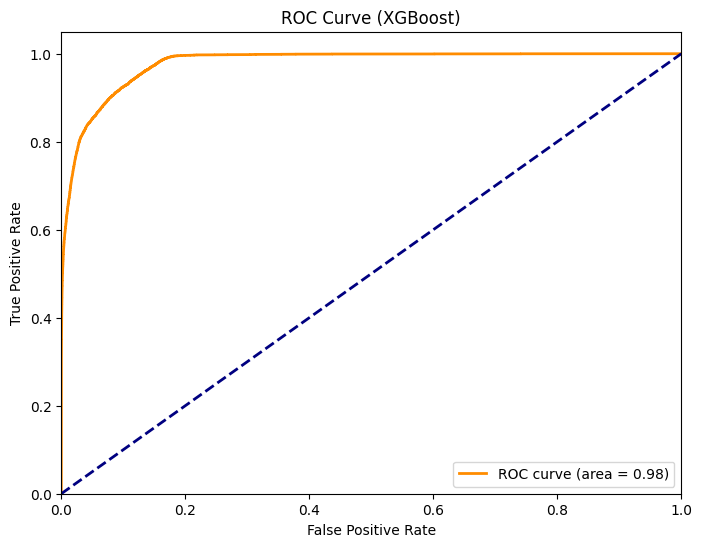

In [ ]:
xgb_model.fit(X_train_smote1, y_train_smote1)
y_pred_xgb = xgb_model.predict(X_test1)
y_prob_xgb = xgb_model.predict_proba(X_test1)[:, 1]

accuracy_xgb = accuracy_score(y_test1, y_pred_xgb)
precision_xgb = precision_score(y_test1, y_pred_xgb)
recall_xgb = recall_score(y_test1, y_pred_xgb)
f1_xgb = f1_score(y_test1, y_pred_xgb)

conf_matrix_xgb = confusion_matrix(y_test1, y_pred_xgb)

TN = conf_matrix_xgb[0, 0]
FP = conf_matrix_xgb[0, 1]
FN = conf_matrix_xgb[1, 0]
TP = conf_matrix_xgb[1, 1]

FPR_xgb = FP / (FP + TN)

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test1, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

print(f"XGBoost - Accuracy: {accuracy_xgb}")
print(f"XGBoost - Precision: {precision_xgb}")
print(f"XGBoost - Recall: {recall_xgb}")
print(f"XGBoost - F1 Score: {f1_xgb}")
print(f"XGBoost - False Positive Rate: {FPR_xgb}")

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (XGBoost)')
plt.legend(loc="lower right")
plt.show()

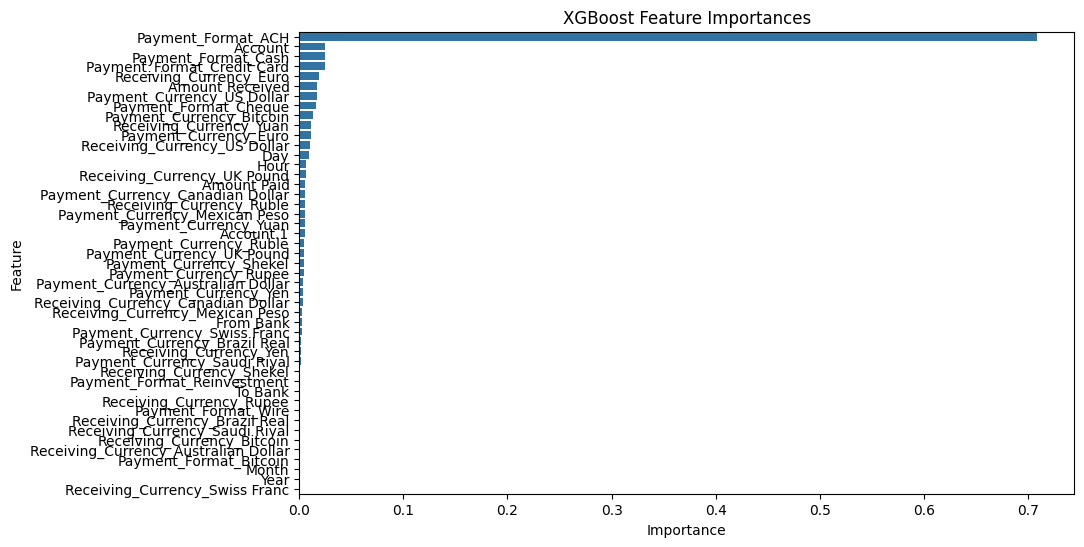

In [ ]:
feature_importances = xgb_model.feature_importances_

feature_imp_df = pd.DataFrame({'Feature': X_train_smote1.columns, 'Importance': feature_importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df)
plt.title('XGBoost Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

####Baseline AdaBoost Model

AdaBoost - Accuracy: 0.8669125191452661
AdaBoost - Precision: 0.27091784989858014
AdaBoost - Recall: 0.9083309719467271
AdaBoost - F1 Score: 0.417355640908795
AdaBoost - False Positive Rate: 0.13538135593220338


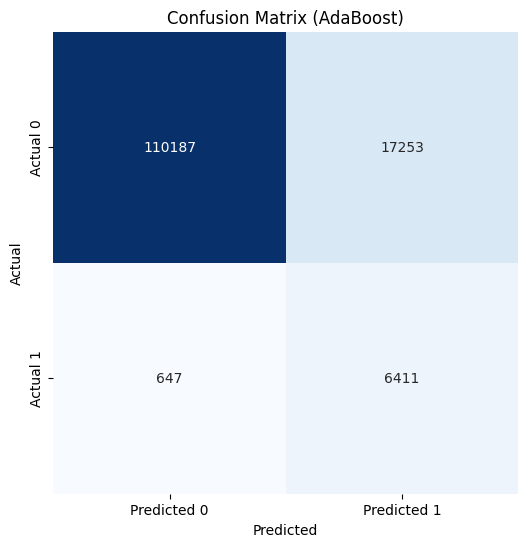

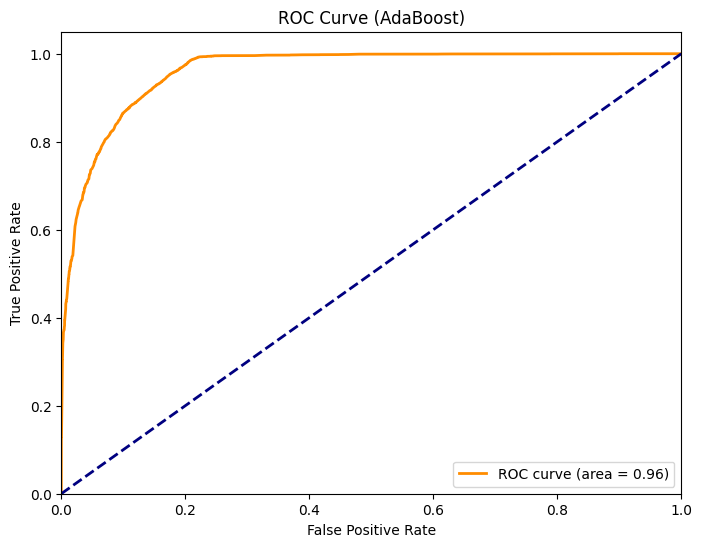

In [ ]:
ada_model.fit(X_train_smote1, y_train_smote1)
y_pred_ada = ada_model.predict(X_test1)
y_prob_ada = ada_model.predict_proba(X_test1)[:, 1]

accuracy_ada = accuracy_score(y_test1, y_pred_ada)
precision_ada = precision_score(y_test1, y_pred_ada)
recall_ada = recall_score(y_test1, y_pred_ada)
f1_ada = f1_score(y_test1, y_pred_ada)

conf_matrix_ada = confusion_matrix(y_test1, y_pred_ada)

TN = conf_matrix_ada[0, 0]
FP = conf_matrix_ada[0, 1]
FN = conf_matrix_ada[1, 0]
TP = conf_matrix_ada[1, 1]

FPR_ada = FP / (FP + TN) if (FP + TN) != 0 else 0

fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test1, y_prob_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)

print(f"AdaBoost - Accuracy: {accuracy_ada}")
print(f"AdaBoost - Precision: {precision_ada}")
print(f"AdaBoost - Recall: {recall_ada}")
print(f"AdaBoost - F1 Score: {f1_ada}")
print(f"AdaBoost - False Positive Rate: {FPR_ada}")

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_ada, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (AdaBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr_ada, tpr_ada, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_ada:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AdaBoost)')
plt.legend(loc="lower right")
plt.show()

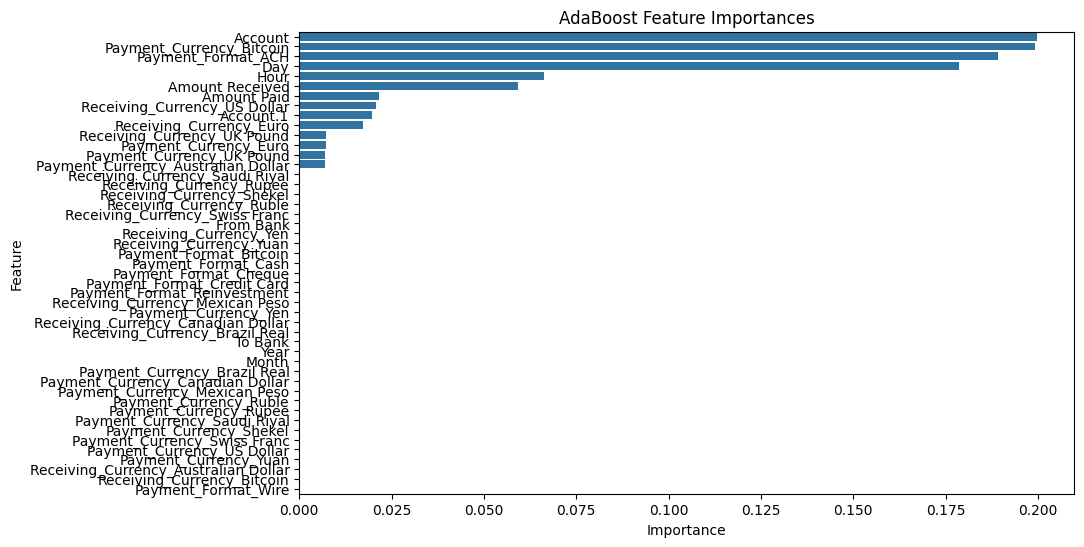

In [ ]:
feature_importances = ada_model.feature_importances_
feature_names = X_train_smote1.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('AdaBoost Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#Interpret


In this section of the project, the machine learning and deep learning models are evaluated across various metrices as below:
- Accuracy
- Precision
- F1-Score
- Recall
- Confusion Matrix
- ROC Curve
- AUC Curve
- False Positive Rates

##Baseline ML Models

###Youden's J for all Baseline ML Models

In [ ]:
def calculate_youden_j(y_true, y_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    j_statistic = tpr - fpr
    best_threshold = thresholds[np.argmax(j_statistic)]
    best_j = np.max(j_statistic)
    return best_j, best_threshold

models = {
    'Naive Bayes': (y_test1, y_prob_nb),
    'Random Forest': (y_test1, y_prob_rf),
    'Logistic Regression': (y_test1, y_prob_lr),
    'Decision Tree': (y_test1, y_prob_dt),
    'Gradient Boosting': (y_test1, y_prob_gb),
    'XGBoost': (y_test1, y_prob_xgb),
    'AdaBoost': (y_test1, y_prob_ada),
}

for model_name, (y_true, y_prob) in models.items():
    youden_j, threshold = calculate_youden_j(y_true, y_prob)
    print(f"{model_name} - Youden's J: {youden_j:.2f}, Optimal Threshold: {threshold:.2f}")

Naive Bayes - Youden's J: 0.30, Optimal Threshold: 0.13
Random Forest - Youden's J: 0.83, Optimal Threshold: 0.11
Logistic Regression - Youden's J: 0.32, Optimal Threshold: 0.50
Decision Tree - Youden's J: 0.69, Optimal Threshold: 1.00
Gradient Boosting - Youden's J: 0.81, Optimal Threshold: 0.21
XGBoost - Youden's J: 0.83, Optimal Threshold: 0.10
AdaBoost - Youden's J: 0.78, Optimal Threshold: 0.48


###Compilation of ROC Curves

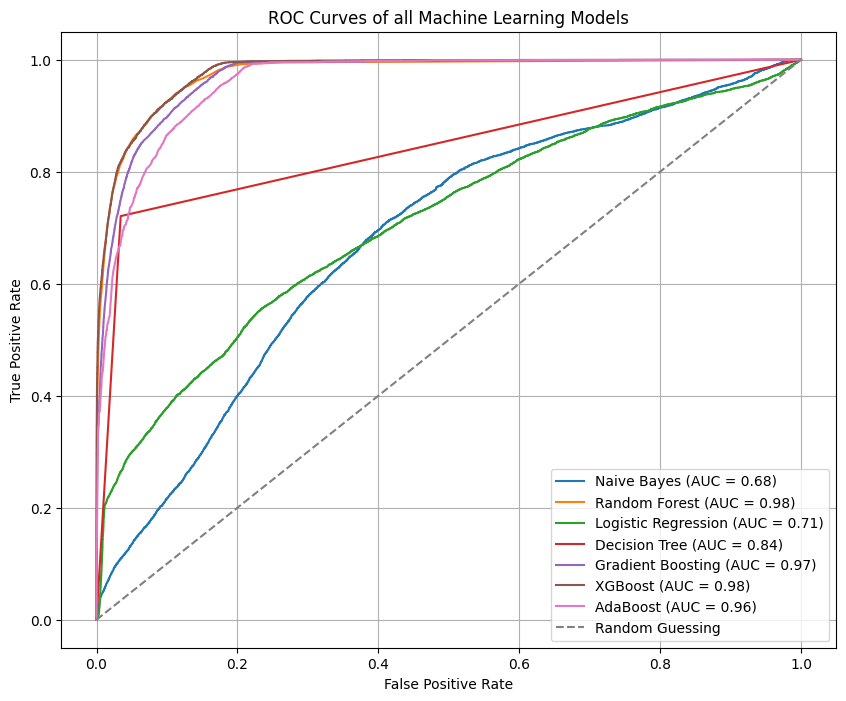

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot(fpr_ada, tpr_ada, label=f'AdaBoost (AUC = {roc_auc_ada:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')  # Add random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of all Machine Learning Models')
plt.legend()
plt.grid(True)
plt.show()

###Table of Evaluation Metrices

In [ ]:
data = {
    'Model': ['Naive Bayes', 'Random Forest', 'Logistic Regression', 'Decision Tree', 'Gradient Boosting', 'XGBoost', 'AdaBoost'],
    'Accuracy': [accuracy_nb, accuracy_rf, accuracy_lr, accuracy_dt, accuracy_gb, accuracy_xgb, accuracy_ada],
    'Precision': [precision_nb, precision_rf, precision_lr, precision_dt, precision_gb, precision_xgb, precision_ada],
    'Recall': [recall_nb, recall_rf, recall_lr, recall_dt, recall_gb, recall_xgb, recall_ada],
    'F1 Score': [f1_nb, f1_rf, f1_lr, f1_dt, f1_gb, f1_xgb, f1_ada],
    'False Positive Rate': [FPR_nb, FPR_rf, FPR_lr, FPR_dt, FPR_gb, FPR_xgb, FPR_ada],
    'ROC AUC': [roc_auc_nb, roc_auc_rf, roc_auc_lr, roc_auc_dt, roc_auc_gb, roc_auc_xgb, roc_auc_ada]
}

df = pd.DataFrame(data)
df

,Model,Accuracy,Precision,Recall,F1 Score,False Positive Rate,ROC AUC
0,Naive Bayes,0.947293,0.237288,0.001984,0.003934,0.000353,0.679448
1,Random Forest,0.964505,0.632237,0.773590,0.695807,0.024922,0.975344
2,Logistic Regression,0.768562,0.119386,0.534854,0.195201,0.218495,0.708845
3,Decision Tree,0.952802,0.537511,0.720742,0.615785,0.034346,0.843198
4,Gradient Boosting,0.933360,0.431322,0.847549,0.571702,0.061888,0.969594
5,XGBoost,0.955858,0.553345,0.823746,0.661998,0.036825,0.977908
6,AdaBoost,0.866913,0.270918,0.908331,0.417356,0.135381,0.960372
